# **Group Assigment Task1 : Predicting Critical Temperature Using `Scikit Learn`**


**Group Name** : Group06

**Tutorial Group** : T01

**Task number** : Task1

**Participants** :
Pyae Sone Hein (8221522)

Kaung Myat Soe (8218924)

Su Thet Min Htet (8221947)

Keerthana Sankaramani (7765733)

Alicia Thum Hew Yan (8234681)

Lim Kuan, Francis (Lin Kang) (7912961)



# **Introduction**

A superconductor is a substance that conducts electricity without resistance when it becomes colder than a critical temperature. The intention of notebook is to implement an end-to-end data mining project by using `Scikit-Learn` to predict critical temperature in the superconductivity dataset.

## **List of main steps**

Here are the main steps that we will go through:

(1) Get the Data

(2) Data Exploration (Discover and Visualize the Data)

(3) Prepare the Data for Machine Learning Algorithms

(4) Select and train the models

(5) Fine-tune the models

(6) Evaluate the model outcomes



## **Algorithm Used**

Since it is a regression problem, we used the following algorithms:


*   Linear Regression
*   Decision Tree
*   K-Nearest Neighbors



# **Summary**



The temperature of at which a material becomes superconductive is what we are trying to predict in this task.

To frame the problem , it is clearly a typical supervised learning task and it is also regression problem. Thus, Mean Square Error(MSE) is chosen as measure to perform this problem.

In order to obtain understanding of the dataset, the project starts with an exploratory data analysis (EDA) phase. Each Data Quality are being checked such as checking missing values, checking outliers, checking correlations and attribute combinations. After the EDA, Data Preprocessing is performed.Once the data is prepared, the selected models will be trained and perform fine-tuning as well. After training the models, they  will be evaluated on a test dataset using the MSE metric.


# **Importing Related Libraries**




The following are the libraries that will be used throughout the project.

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# **Get the Dataset**

To download the data, it is requried to be mounted to the content of Google Drive folder.

In [ ]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


Next, the dataset is fetched from the 'train.csv' which is stored in "dataset" folder of our workspace. Now, All the data are loaded using Pandas.

In [ ]:
default_path = "/content/drive/My Drive/CSCI316_GP_Assignment/dataset/train.csv"
print(f"Default path is set to: {default_path}")
user_path = input("If you have a different path, please enter it here. Otherwise, press Enter to use the default path: ")

# Use the user-specified path or the default path
path = user_path if user_path else default_path

# Read the CSV file
dataset_sc = pd.read_csv(path)

Default path is set to: /content/drive/My Drive/CSCI316_GP_Assignment/dataset/train.csv
If you have a different path, please enter it here. Otherwise, press Enter to use the default path: 


## **Take a Quick Look at the Data Structure**


For now, we will take a look at quick description of the dataset.

In [ ]:
dataset_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

There are altogether $21263$ instances in the dataset and they are numerical. There are also no null values.

Next, we will look top five rows using `head()` method.

In [ ]:
#See dataset_sc for first five rows
dataset_sc.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


We can see that the features have a wide range of values and some of the features seem highly correlated. We will take care of this later.

We can also see a summary of all those features.

In [ ]:
dataset_sc.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


There is notably a difference between mean and median ,thus some features might suggest possible skewness in the distributions. Additionally, Large standard deviations for certain features indicate high variability in the data. Moreover, The vlaue of `min `and `max` values are far from the mean and quartiles. This could cause potential outliers. We will also take care of this later.

Since we're trying to predict `'critical_temp'`, let's visualize its distribution and pair plot the other selected random features to see relationships wtih it.


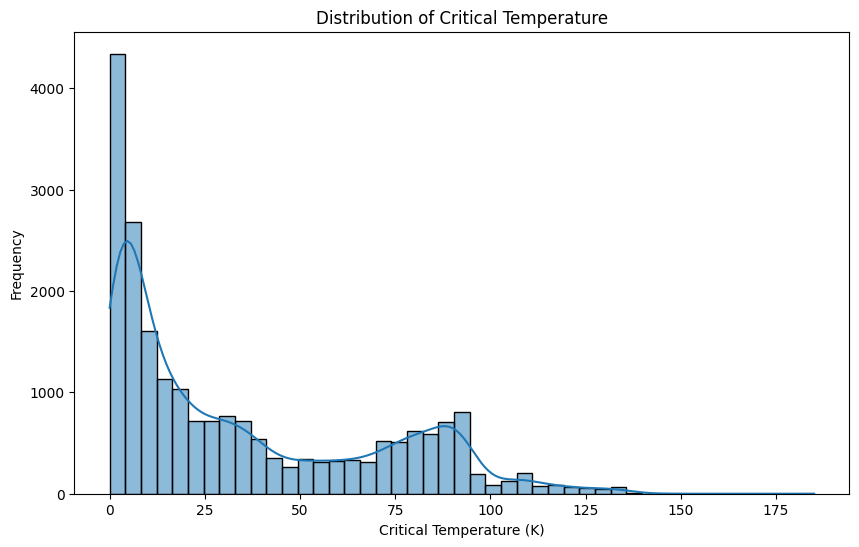

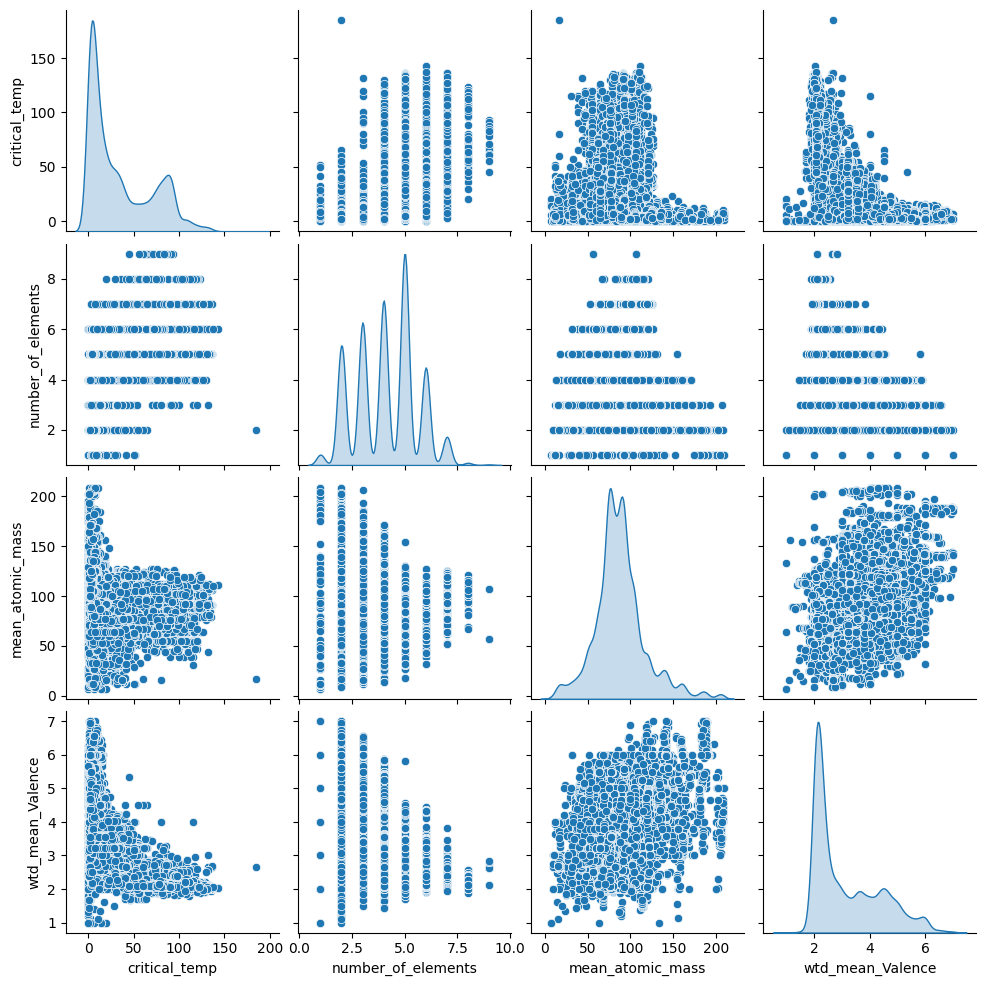

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset_sc['critical_temp'], kde=True)
plt.title('Distribution of Critical Temperature')
plt.xlabel('Critical Temperature (K)')
plt.ylabel('Frequency')
plt.show()


sns.pairplot(dataset_sc[['critical_temp', 'number_of_elements', 'mean_atomic_mass', 'wtd_mean_Valence']], diag_kind='kde')
plt.show()


1. The distribution of critical temperature appears to be right-skewed, with a long tail extending towards higher temperatures. This indicate that most superconductors have relatively low critical temperatures, with a smaller number of materials exhibiting higher critical temperatures.

2.  In the pair plot, it reveals some interesting relationships between 'critical_temp' and the other features:
 - There seems to be a weak positive correlation between the number of elements in a superconductor and its critical temperature. Superconductors with more elements tend to have slightly higher critical temperatures.  

 - The relationship between mean atomic mass and critical temperature is less clear. There might be a slight negative correlation, suggesting that superconductors with lighter elements could have higher critical temperatures.

  - There appears to be a weak positive correlation between weighted mean valence and critical temperature, indicating that superconductors with higher weighted mean valence might have slightly higher critical temperatures.

Before we look at data any further, we shall need to create a train and test set.

## **(1) Create a test set and training set using stratified sampling**

Since the `critical_temp` is a continuous numerical attribute, we need to create a bin attribute. It is important to have a sufficient number of instances in our dataset for each stratum, or else the estimate of the stratum's importance may be biased. This means that we should not have too many strata, and each stratum should be large enough.

Thus, we uses the pd.cut() function to create a critical_temp_bins attribute with 5 categories (labeled from 1 to 4).

<Axes: >

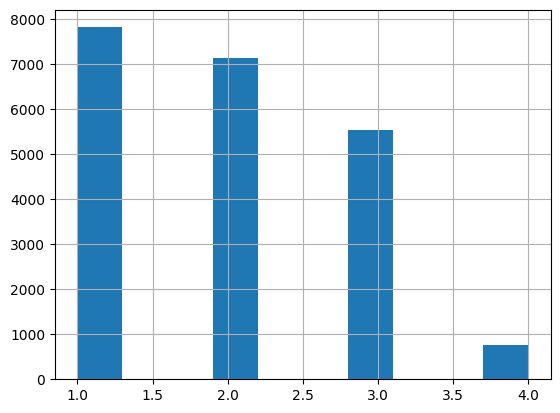

In [ ]:
bins = [0., 10., 50., 100., np.inf]
labels = [1, 2, 3, 4]

# Apply binning
dataset_sc['critical_temp_bins'] = pd.cut(dataset_sc['critical_temp'], bins=bins, labels=labels)

# Plot to visualize the distribution of binned categories
dataset_sc['critical_temp_bins'].hist()

Sciki-Learn provides a few functions to split dataset into mutlitple subsets in various ways. Since we need to do stratified sampling based on the `critical temp`, we will use `StratifiedShuffleSplit` class.

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(dataset_sc, dataset_sc["critical_temp_bins"]):
    strat_train_set = dataset_sc.loc[train_index]
    strat_test_set = dataset_sc.loc[test_index]

We can check whether it work as expected or not by using the `critical_temp_bins` in the `strat_test_set`.

In [ ]:
# Calculate the overall distribution
overall_dist = dataset_sc['critical_temp_bins'].value_counts(normalize=True)

# Calculate the distribution in the test set (you already have this)
test_dist = strat_test_set['critical_temp_bins'].value_counts(normalize=True)

# Print both distributions to compare
print("Overall distribution:")
print(overall_dist)
print("\nTest set distribution:")
print(test_dist)


Overall distribution:
critical_temp_bins
1    0.367822
2    0.335936
3    0.260123
4    0.036119
Name: proportion, dtype: float64

Test set distribution:
critical_temp_bins
1    0.367740
2    0.335998
3    0.260052
4    0.036210
Name: proportion, dtype: float64


In this output, The values in `test_dist` are close to those in `overall_dist` which means that the stratified sampling has preserved the overall distribution well.

After the comparison is done, we shall drop the the "`critical_temp_bins`" in each separate train and test set.

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("critical_temp_bins", axis=1, inplace=True)

In [ ]:
dataset_sc = dataset_sc.drop(columns=['critical_temp_bins'])

# **(2) (a) Data Exploration (Discover and Visualize the Data)**

Now, we will go a little bit more in depth to discover and visualize the data to gain insights.

While exploring the data, we are going to put the test set aside and only exploring the `strat_train_set`. We will create a copy of it so that we can play with it without harming the original one.

In [ ]:
scCopy = strat_train_set.copy()

## **Looking for Missing Values**

Initially, we can show whethere there are missing values or not with heatmap.

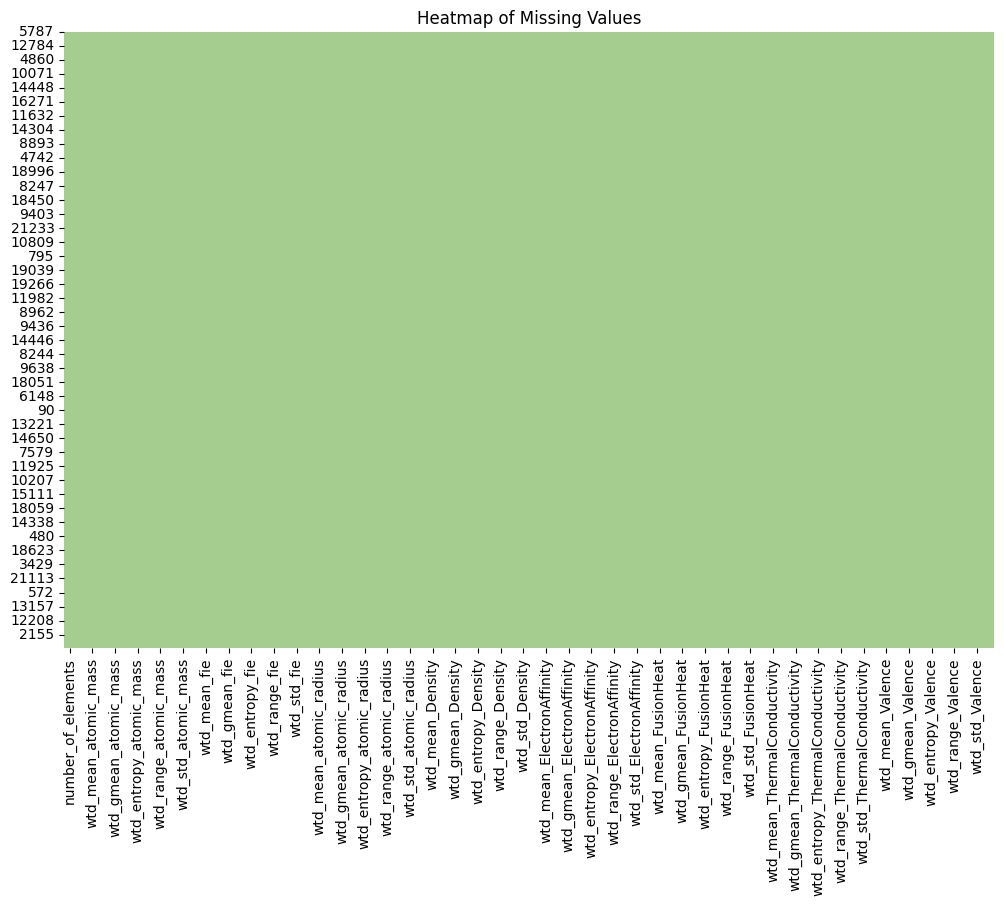

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(scCopy.isnull(), cbar=False, cmap='crest')
plt.title('Heatmap of Missing Values')
plt.show()


 As we all knew, there are no missing values in the dataset as shown in the heatmap.

## **Looking for Outliers**

Next, we will identify any outliers of `critical_temp` values.

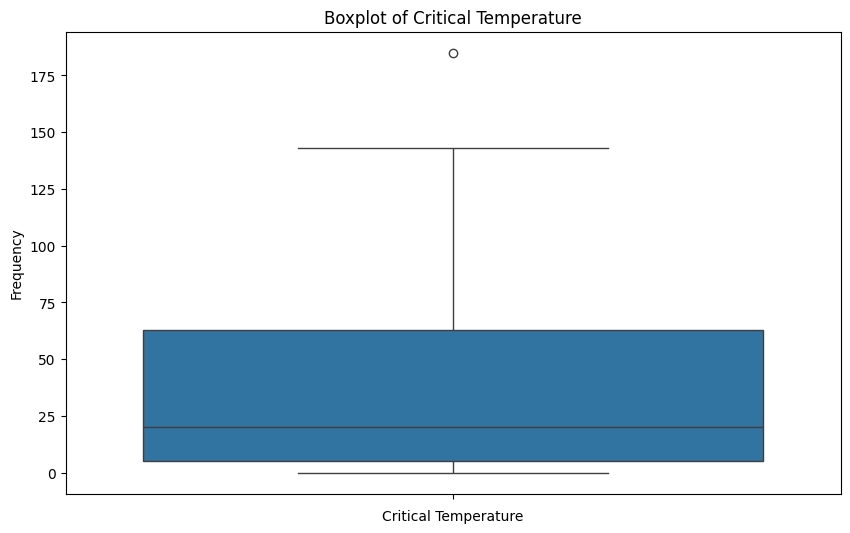

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(scCopy['critical_temp'])
plt.title('Boxplot of Critical Temperature')
plt.xlabel('Critical Temperature')
plt.ylabel('Frequency')
plt.show()


Based on the box plot, there are some outliers present in the `critical_temp` variable,
particularly on the higher end of the distribution. These outliers could potentially affect the performance of certain machine learning models that are sensitive to outliers. We will handle this later.

## **Looking for Correlations**

We will calculate the standarad correlation coefficient between every pair of attributes using the `corr` method.

In [ ]:
threshold = 0.85
correlation_matrix = scCopy.corr()

Next, we will look out how much each attributes correlates with `critical_temp`

In [ ]:
correlation_matrix['critical_temp'].sort_values(ascending=False)

,critical_temp
critical_temp,1.000000
wtd_std_ThermalConductivity,0.721966
range_ThermalConductivity,0.688034
std_ThermalConductivity,0.655238
range_atomic_radius,0.653203
...,...
gmean_Density,-0.539069
gmean_Valence,-0.572135
mean_Valence,-0.599728
wtd_gmean_Valence,-0.613807


Now, we will only plot out the most correlated with the target variable.

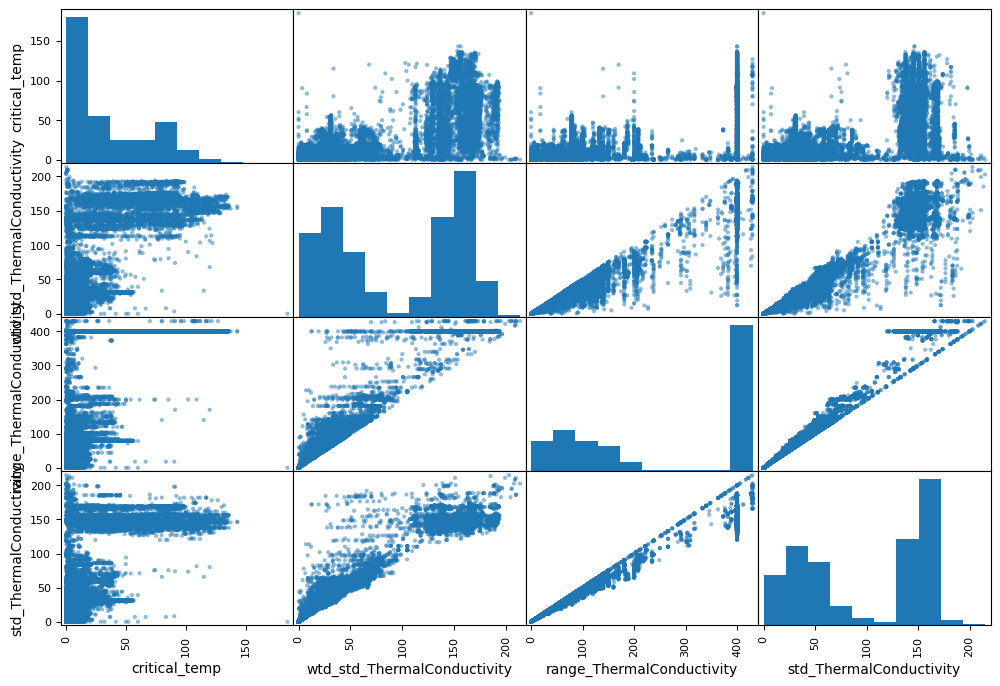

In [ ]:
attributes=['critical_temp', 'wtd_std_ThermalConductivity',	'range_ThermalConductivity','std_ThermalConductivity']
scatter_matrix(scCopy[attributes], figsize=(12, 8))
plt.show()

For further comprehensive exploration, we shall plot out the target variable with the most highest correlation attribute ,`'wtd_std_ThermalConductivity'`.

<Axes: xlabel='wtd_std_ThermalConductivity', ylabel='critical_temp'>

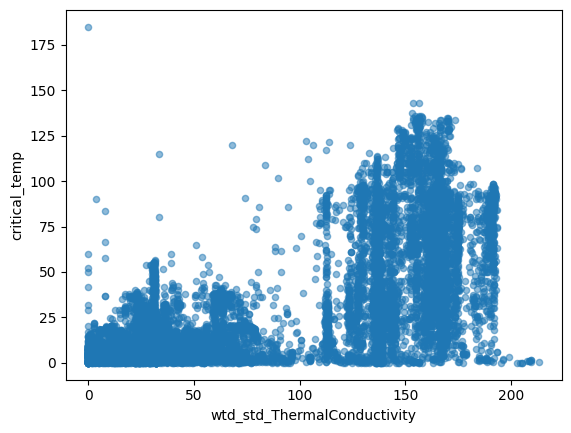

In [ ]:
scCopy.plot(kind="scatter", x="wtd_std_ThermalConductivity", y="critical_temp", alpha=0.5)


From the chart, we can see a somewhat positive correlation. This suggests that materials with higher weighted standard deviation of thermal conductivity tend to have higher critical temperatures.
However, the relationship is not perfectly linear, and there is a noticeable spread of data points, indicating other factors also influence critical temperature.


## **Looking for Attribute combinations**

We shall now look attribution combinations before feeding the data into the algorithms.


To identify relationships between features, we can use correlation matrix for better understanding.

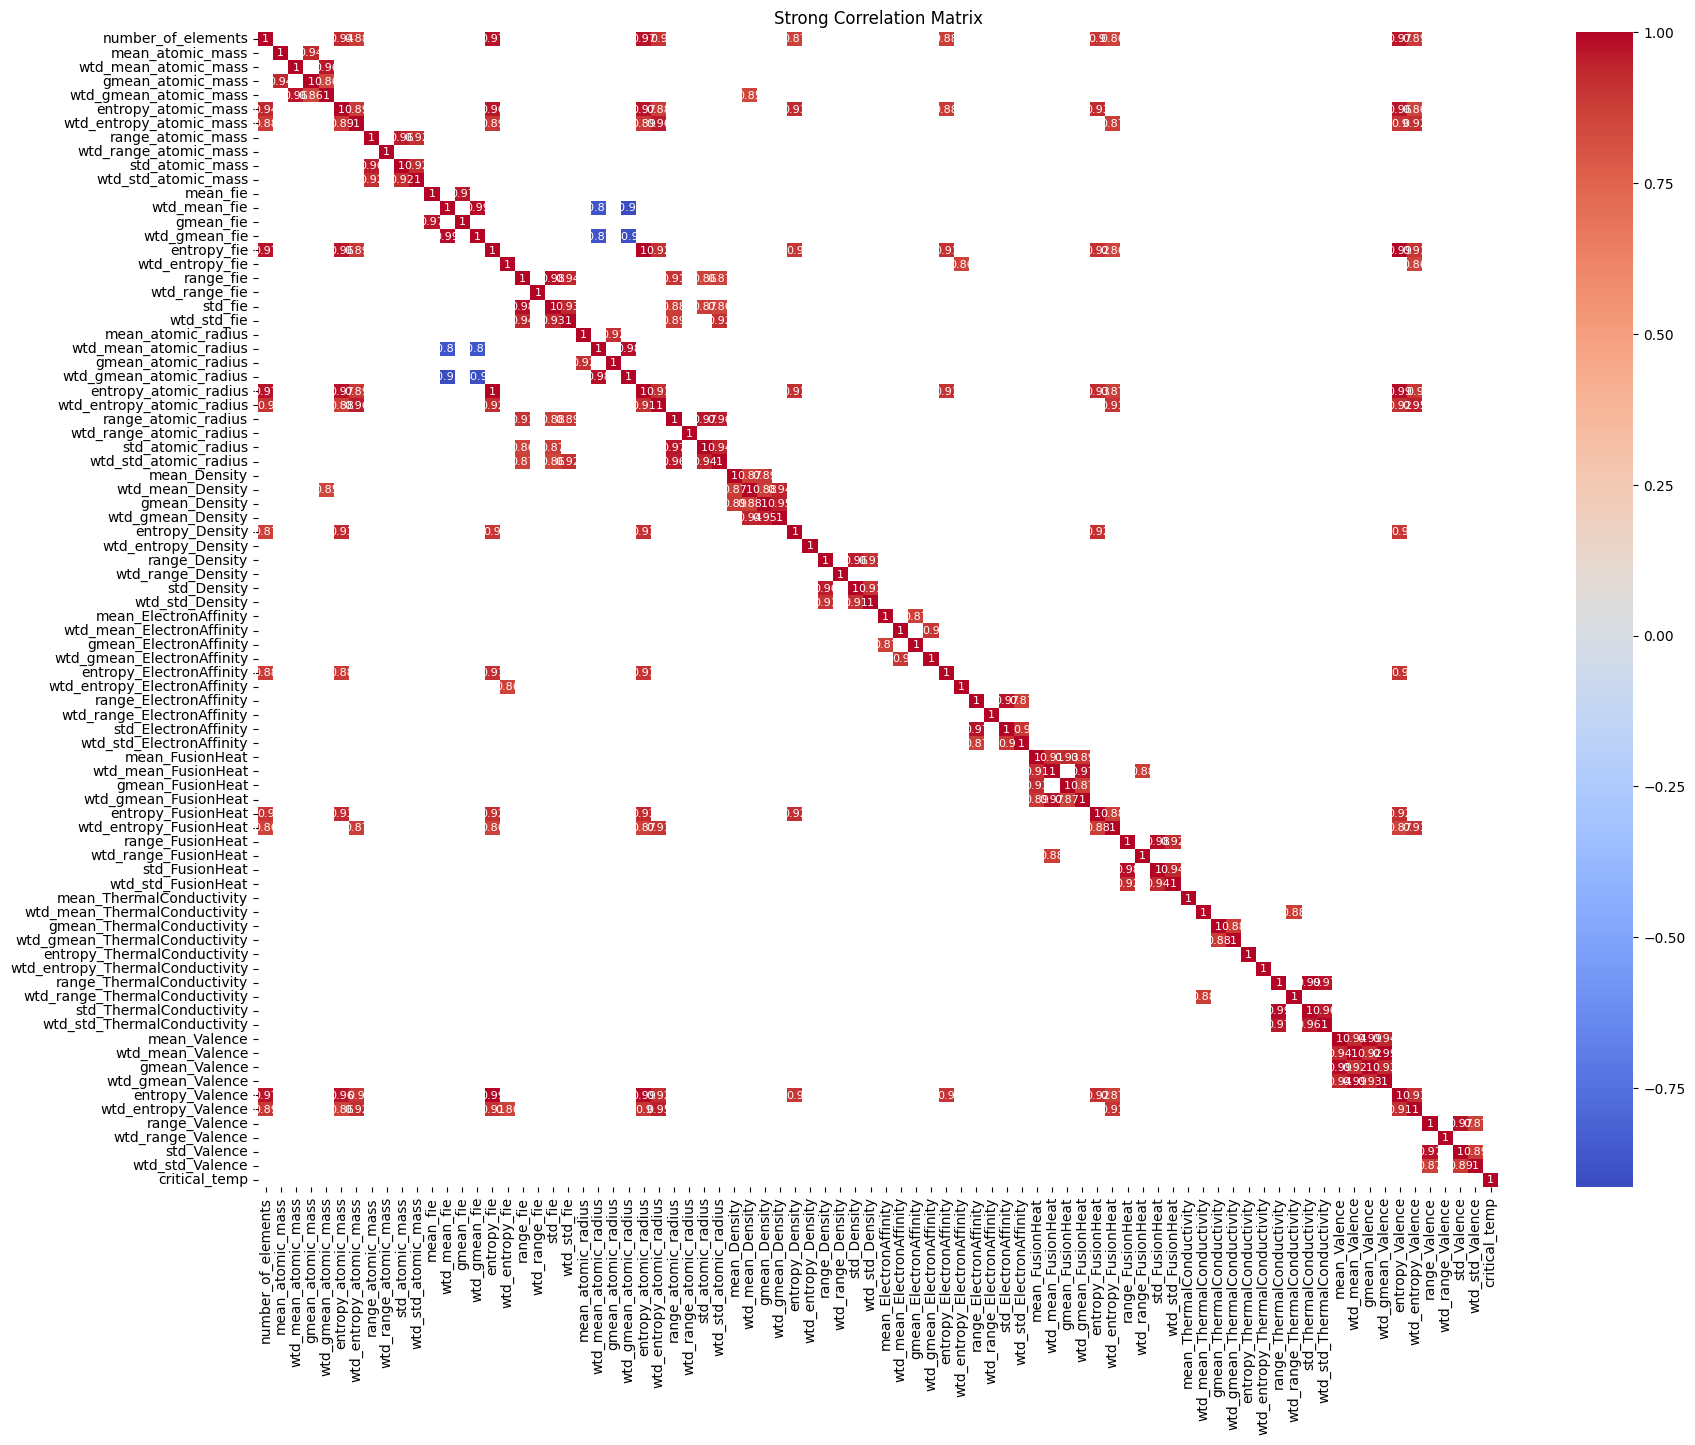

In [ ]:
strong_correlations = correlation_matrix[(correlation_matrix >= threshold) | (correlation_matrix <= -threshold)]

plt.figure(figsize=(20, 15))
sns.heatmap(strong_correlations, annot=True, cmap='coolwarm', mask=strong_correlations.isnull(), annot_kws={"size": 8})
plt.title('Strong Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Inisght received from the above matrix is that **wtd_mean_fie** is strongly correlated with **wtd_mean_atomic_mass, wtd_gmean_atomic_radius,** and other related features.

On the other hand, When features are highly correlated, they carry similar information, which could lead to potential multicollinearity. This can cause instability in some types of models, such as linear regression, making it harder to determine the effect of each feature independently. Since "Linear Regression" is one of our selected algorithms, we need to address this by removing or combining correlated features or using regularization techniques.

In [ ]:
# Display the pairs
strong_correlations = strong_correlations[strong_correlations != 0].unstack().drop_duplicates().sort_values()
print(strong_correlations)

wtd_mean_fie           wtd_gmean_atomic_radius   -0.913498
wtd_gmean_fie          wtd_gmean_atomic_radius   -0.896711
                       wtd_mean_atomic_radius    -0.870525
wtd_mean_fie           wtd_mean_atomic_radius    -0.868660
wtd_gmean_atomic_mass  wtd_mean_Density           0.852514
                                                    ...   
entropy_fie            entropy_Valence            0.992665
wtd_mean_Valence       wtd_gmean_Valence          0.994852
entropy_fie            entropy_atomic_radius      0.997728
number_of_elements     number_of_elements         1.000000
                       mean_atomic_mass                NaN
Length: 121, dtype: float64


According to this output, we decided to use "**wtd_mean_fie**" and "**wtd_gmean_atomic_radius**" as combine features to reduce redundancy in the dataset, simplify the model like Linear Regression, and help it perform better by focusing on the most important interactions between features.

# **(2) (b) Prepare the Data for Machine Learning Algorithms**

Now, we will do data preprocesssing before feeding it into the selected algorithms.

## **Data Cleaning**

As we notice that the outliers are existed, we have to handle outliers. Thus, we will build a custom function to detect outliers.

In [ ]:
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Call the function and print the outliers
outliers = detect_outliers_iqr(strat_train_set)
for column, outlier_values in outliers.items():
    if not outlier_values.empty:
        print(f'Outliers detected in {column}:')
        print(outlier_values)
        print("\n")

Outliers detected in number_of_elements:
5262     9
5236     9
5235     9
5232     9
5233     9
19620    9
5264     9
5234     9
5263     9
19619    9
5231     9
19618    9
Name: number_of_elements, dtype: int64


Outliers detected in mean_atomic_mass:
14220     12.010700
15682    191.223500
12484    183.577440
14284     22.037850
2128      25.554500
            ...    
15767    144.556250
15440    156.936135
15668    159.600650
14776     17.558000
11252     17.996860
Name: mean_atomic_mass, Length: 1285, dtype: float64


Outliers detected in wtd_mean_atomic_mass:
16551    167.761100
15682    191.422200
15764    186.152852
12484    184.366308
11651    163.306975
            ...    
12382    190.230000
12505    184.892220
15767    184.540970
15440    139.266083
15668    164.078915
Name: wtd_mean_atomic_mass, Length: 1001, dtype: float64


Outliers detected in gmean_atomic_mass:
16551    130.873605
14220     12.010700
15682    191.220919
4150      26.270151
15764    133.672823
          

Now, we will analyze a few outliers in detail to understand if they represent data errors or legitimate extreme values.To do so, We need to decide if we will remove or cap them, or transform the data.

In this specific case, removing outliers from `'critical_temp'` could potentially bias the model towards predicting lower temperatures, as the higher temperature superconductors would be underrepresented in the training data.

Therefore, we decided to keep the outliers for now.

## **(4) User-Defined Transformers**

After handling the outliers, let's proceed to build the custom Transformers.

Although Scikit-Learn provides many useful transformers, we built the custom Transformers for our own for tasks such as custom cleanup operations or combining specific attributes. We want our transformer to work seamlessly with Scikit-Learn functionalities (such as pipelines), and since Scikit-Learn relies on duck typing (not inheritance).Thus, we create a class and implement three methods: fit() (returning self), transform(), and fit_transform().

In [ ]:
class CustomFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, use_new_feature=True):
        self.use_new_feature = use_new_feature

    def fit(self, X, y=None):
        # No fitting necessary for this transformer, so just return self
        return self

    def transform(self, X, y=None):
        # Example: Generating a new feature by combining existing features
        X = X.copy()  # Create a copy to avoid changing the original dataset
        if self.use_new_feature:
            # Generating a new feature
            X['new_feature'] = X['wtd_mean_fie'] * X['wtd_gmean_atomic_radius']
        return X

    def fit_transform(self, X, y=None):
        # Calls fit and transform sequentially
        return self.fit(X, y).transform(X, y)


In our Transformer, it has one hyperparameter, `use_new_feature`, set to True by default indicating whether the Machine Learning use the new feature(s) or not.

## **Feature Scaling**

Now, we will do **scaling** the features by using `StandardScaler`.

In [ ]:
scaler = StandardScaler()
strat_train_set_scaled = scaler.fit_transform(strat_train_set)
strat_test_set_scaled = scaler.transform(strat_test_set)

# Convert scaled data back to DataFrame
strat_train_set_scaled_dataset = pd.DataFrame(strat_train_set_scaled,columns=strat_train_set.columns)
strat_test_set_scaled_dataset = pd.DataFrame(strat_test_set_scaled, columns =strat_test_set.columns)

In [ ]:
strat_train_set_scaled_dataset.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,1.309154,0.666469,0.342171,0.189625,0.215652,1.040189,1.110758,1.255384,-0.166338,1.339070,...,-0.872609,-0.564106,-0.848013,0.835192,1.593219,2.370932,-0.994710,2.106778,0.132906,2.875733
1,0.613105,0.060893,-0.635090,-0.019471,-0.636587,0.764547,0.727954,0.164262,-0.488790,0.119576,...,-0.894896,-0.538133,-0.838225,0.684056,0.515727,-0.039585,-0.444628,-0.086686,-0.813972,1.489798
2,0.613105,0.504570,-0.336972,0.161953,-0.572514,0.616771,1.204180,1.324734,-0.799040,1.016041,...,-0.713727,-0.538133,-0.698047,0.684056,0.915099,-0.039585,-0.594890,-0.086686,-0.078917,0.249752
3,-1.475044,0.204404,0.641877,0.723278,0.983686,-1.298499,-1.087719,-2.032746,0.012608,-2.098205,...,1.837741,1.770920,1.869180,-1.590552,-1.298154,-0.039585,1.221434,0.325856,0.583602,-0.880295
4,0.613105,-0.493712,-0.622328,-0.385566,-0.622322,0.773381,0.715525,0.098800,-0.459252,-0.233028,...,-0.899890,-0.847461,-0.840872,0.758544,0.564971,-0.843090,-0.467003,-0.911770,-0.891638,0.891658


In [ ]:
strat_test_set_scaled_dataset.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,0.613105,-0.619289,0.151468,-0.526055,0.166667,0.694937,0.193095,0.098800,0.138137,-0.134744,...,-0.905988,-0.847461,-0.846042,0.758544,0.946889,-0.843090,-0.785824,-0.911770,-0.917255,1.241789
1,-0.082945,-0.201988,0.047326,0.079568,0.205944,0.386836,0.206148,-0.804263,-0.231658,-0.745906,...,1.557360,2.040486,1.605517,0.195564,0.425419,-0.039585,0.124786,-0.026546,0.306956,-0.920268
2,-0.082945,-0.371498,-0.458920,-0.382767,-0.610615,0.085938,-0.411499,0.127658,0.179614,-0.011262,...,-0.731751,-0.804858,-0.692154,0.184135,-0.126594,-0.843090,-0.359894,-0.843674,-0.499466,-1.004854
3,-1.475044,4.066339,4.043555,4.421501,4.095158,-1.297646,-0.956250,-2.086780,-0.041588,-2.171774,...,1.199874,1.361534,1.277226,-1.554977,-1.040871,-0.843090,-0.312160,-0.705499,-0.398615,-0.770587
4,-0.082945,0.047647,-0.448951,-0.155064,-0.607605,0.043460,-0.116324,0.127658,0.027440,0.371034,...,-0.743167,-0.804858,-0.702637,0.184135,-0.018721,-0.843090,-0.387800,-0.843674,-0.514716,-0.625575


After scaling, we should re-plot some histograms to verify that the data looks reasonable.

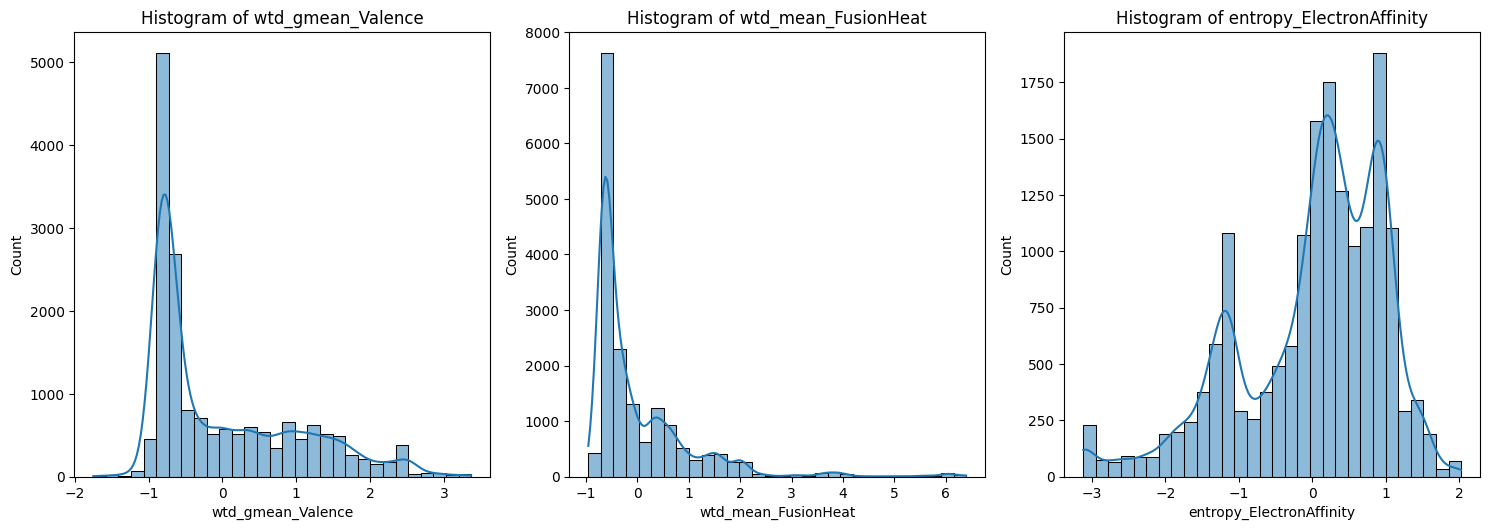

Subset dataset shape: (17010, 3)
First few rows of the subset dataset:
   wtd_gmean_Valence  wtd_mean_FusionHeat  entropy_ElectronAffinity
0          -0.848013            -0.336796                  0.119053
1          -0.838225            -0.602489                  0.833078
2          -0.698047            -0.687961                  0.559197
3           1.869180             1.206001                 -1.204549
4          -0.840872            -0.587286                  0.928431


In [ ]:
useful_columns = ['wtd_gmean_Valence','wtd_mean_FusionHeat','entropy_ElectronAffinity']
subset_df = strat_train_set_scaled_dataset[useful_columns]


plt.figure(figsize=(15, 10))
for i, column in enumerate(subset_df.columns):
    plt.subplot(len(subset_df.columns) // 3 + 1, 3, i + 1)
    sns.histplot(subset_df[column], bins=30, kde=True)
    plt.title(f"Histogram of {column}")
plt.tight_layout()
plt.show()

print("Subset dataset shape:", subset_df.shape)
print("First few rows of the subset dataset:")
print(subset_df.head())

The skewness in the distributions suggests that these features might benefit from a transformation to make them more normally distributed.

Continuously, before training the model, we shall prepare the datas for them.

In [ ]:
X_train = strat_train_set_scaled_dataset.drop(['critical_temp'], axis=1)  # Drop the target variable column
y_train = strat_train_set_scaled_dataset['critical_temp']

In [ ]:
# Separate predictors and labels in the test set
X_test = strat_test_set_scaled_dataset.drop(['critical_temp'], axis=1)  # Drop the target variable column
y_test = strat_test_set_scaled_dataset['critical_temp']  # Target variable

# **(2) (c) Select and train the models**

Now, we are ready to select and train our selected models with the help of `Pipeline` class to perform transformations sequencially. While training, we will be used `x_train` and `y_train` only.

Additionally, we prefrom the hyperparameter tuning while training the model as well.

Since there's no hyperparameter tuning for Linear Regression, we fit the model directly.

In [ ]:
# Linear Regression
pipeline_lr = Pipeline([
    ('custom_transform', CustomFeatureTransformer(use_new_feature=True)),
    ('model', LinearRegression())
])
# Fit the pipeline on the training data
pipeline_lr.fit(X_train, y_train)



Pipeline(steps=[('custom_transform', CustomFeatureTransformer()),
                ('model', LinearRegression())])

## **(2) (d) Fine-tune the models**

For Decision Tree, we include hyperparameter tuning using `GridSearchCV` .

In [ ]:
# Decision Tree
param_grid_dt = {
    'model__max_depth': [3, 5, 7, 10],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

pipeline_dt = Pipeline([
    ('custom_transform', CustomFeatureTransformer(use_new_feature=True)),
    ('model', DecisionTreeRegressor())
])
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('custom_transform',
                                        CustomFeatureTransformer()),
                                       ('model', DecisionTreeRegressor())]),
             param_grid={'model__max_depth': [3, 5, 7, 10],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

For KNN, we also include hyperparameter tuning using `GridSearchCV` .

In [ ]:
# K-Nearest Neighbors (KNN)
param_grid_knn = {
    'model__n_neighbors': [1, 3, 5, 7, 9, 11],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['minkowski', 'euclidean', 'manhattan']
}

pipeline_knn = Pipeline([
    ('custom_transform', CustomFeatureTransformer(use_new_feature=True)),
    ('model', KNeighborsRegressor())  # KNN model
])

grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('custom_transform',
                                        CustomFeatureTransformer()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__metric': ['minkowski', 'euclidean',
                                           'manhattan'],
                         'model__n_neighbors': [1, 3, 5, 7, 9, 11],
                         'model__weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

# **(2) (e) Evaluate the outcomes**

Now, it'all about the time to  evaluate the final model on the test set.

In [ ]:
y_pred_lr = pipeline_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)

print("Results for Linear Regression:")
print(f"MSE: {mse_lr}")
print("-" * 30)

Results for Linear Regression:
MSE: 0.26017824822362495
------------------------------


In [ ]:
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print("Results for Decision Tree:")
print(f"MSE: {mse_dt}")
print(f"Best parameters: {grid_search_dt.best_params_}")
print("-" * 30)

Results for Decision Tree:
MSE: 0.13623517787462214
Best parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5}
------------------------------


In [ ]:
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)

print("Results for KNN:")
print(f"MSE: {mse_knn}")
print(f"Best parameters: {grid_search_knn.best_params_}")
print("-" * 30)

Results for KNN:
MSE: 0.08471769092850814
Best parameters: {'model__metric': 'manhattan', 'model__n_neighbors': 5, 'model__weights': 'distance'}
------------------------------


## **(6) A comparsion of models' performance**

In [ ]:
#Calculating the accuracy score
accuracy_lr=r2_score(y_test, y_pred_lr)
accuracy_dt=r2_score(y_test, y_pred_dt)
accuracy_knn=r2_score(y_test, y_pred_knn)

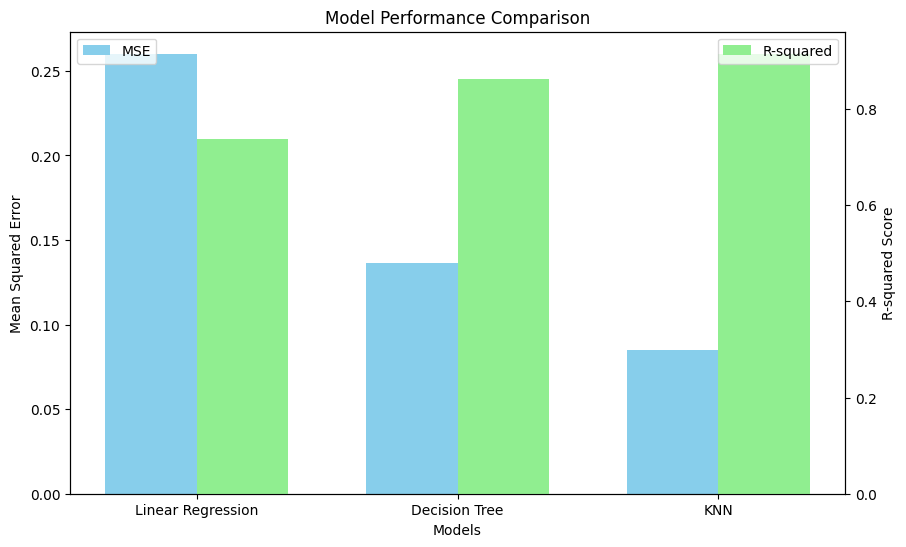

In [ ]:
models = ['Linear Regression', 'Decision Tree', 'KNN']
mse_values = [mse_lr, mse_dt, mse_knn]
r2_values = [accuracy_lr, accuracy_dt, accuracy_knn]

#the positions and width for the bars
x = np.arange(len(models))
width = 0.35


fig, ax1 = plt.subplots(figsize=(10, 6))

bar1 = ax1.bar(x - width/2, mse_values, width, label='MSE', color='skyblue')
ax1.set_xlabel('Models')
ax1.set_ylabel('Mean Squared Error')
ax1.set_title('Model Performance Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend(loc='upper left')

#a secondary y-axis for the R-squared values
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, r2_values, width, label='R-squared', color='lightgreen')
ax2.set_ylabel('R-squared Score')
ax2.legend(loc='upper right')

plt.show()

By comparing all the models, the KNN model performs the best in terms of both MSE and R² score, making it the most suitable model among the three for predicting the critical temperature. The Decision Tree model also performs well, but not as well as KNN, while Linear Regression shows the least accurate predictions.

We can also see comparison of the actual and predicted values for all three models as well.

In [ ]:
results_df = pd.DataFrame({
    'Actual Critical Temp': y_test,
    'Predicted Critical Temp (KNN)': y_pred_knn,
    'Predicted Critical Temp (Decision Tree)': y_pred_dt,
    'Predicted Critical Temp (Linear Regression)': y_pred_lr,
    'Accuracy score(LR)': [accuracy_lr] * len(y_test),
    'Accuracy score(DT)': [accuracy_dt] * len(y_test),
    'Accuracy score(KNN)': [accuracy_knn] * len(y_test)

})

results_df.head()


,Actual Critical Temp,Predicted Critical Temp (KNN),Predicted Critical Temp (Decision Tree),Predicted Critical Temp (Linear Regression),Accuracy score(LR),Accuracy score(DT),Accuracy score(KNN)
0,1.241789,1.292511,1.177095,1.577660,0.738343,0.86299,0.914801
1,-0.920268,-0.814240,-0.649483,-0.884901,0.738343,0.86299,0.914801
2,-1.004854,-0.657670,-0.701283,-0.454137,0.738343,0.86299,0.914801
3,-0.770587,-0.788491,-0.778757,-0.709515,0.738343,0.86299,0.914801
4,-0.625575,-0.129556,-0.251788,-0.198993,0.738343,0.86299,0.914801


As we all know, the KNN model consistently predicts the critical temperature values more accurately than both the Decision Tree and Linear Regression models, as evidenced by its higher accuracy score and closer alignment with the actual critical temperature values. This makes KNN the most reliable model in this comparison for predicting critical temperature.

# **Conclusion**

The project successfully demonstrated the application of machine learning techniques to predict critical temperature in superconductors. Among the three models tested, the KNN model emerged as the best performer, showing the highest accuracy and lowest prediction error. The Decision Tree model also performed well, but Linear Regression, while simple and interpretable, was less accurate in this case.

This study highlights the importance of thorough data preprocessing, feature engineering, and model selection in achieving optimal predictive performance. The approach and methodology used in this project can be applied to similar predictive modeling tasks in different domains.






